In [ ]:
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz


--2024-10-14 14:42:00--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 495854086 (473M) [application/x-gzip]
Saving to: ‘reviews_Electronics_5.json.gz’

reviews_Electronics 100%[===================>] 472.88M  30.1MB/s    in 17s     

2024-10-14 14:42:17 (27.8 MB/s) - ‘reviews_Electronics_5.json.gz’ saved [495854086/495854086]



In [ ]:
!gunzip reviews_Electronics_5.json.gz



In [ ]:
import pandas as pd

# Load the JSON dataset
data = pd.read_json('reviews_Electronics_5.json', lines=True)

# Display the first few rows of the dataset
print(data.head())


       reviewerID        asin              reviewerName   helpful  \
0   AO94DHGC771SJ  0528881469                   amazdnu    [0, 0]   
1   AMO214LNFCEI4  0528881469           Amazon Customer  [12, 15]   
2  A3N7T0DY83Y4IG  0528881469             C. A. Freeman  [43, 45]   
3  A1H8PY3QHMQQA0  0528881469  Dave M. Shaw "mack dave"   [9, 10]   
4  A24EV6RXELQZ63  0528881469               Wayne Smith    [0, 0]   

                                          reviewText  overall  \
0  We got this GPS for my husband who is an (OTR)...        5   
1  I'm a professional OTR truck driver, and I bou...        1   
2  Well, what can I say.  I've had this unit in m...        3   
3  Not going to write a long review, even thought...        2   
4  I've had mine for a year and here's what we go...        1   

                                  summary  unixReviewTime   reviewTime  
0                         Gotta have GPS!      1370131200   06 2, 2013  
1                       Very Disappointed      1

In [ ]:
# Check the structure and columns of the dataset
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689188 entries, 0 to 1689187
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   reviewerID      1689188 non-null  object
 1   asin            1689188 non-null  object
 2   reviewerName    1664458 non-null  object
 3   helpful         1689188 non-null  object
 4   reviewText      1689188 non-null  object
 5   overall         1689188 non-null  int64 
 6   summary         1689188 non-null  object
 7   unixReviewTime  1689188 non-null  int64 
 8   reviewTime      1689188 non-null  object
dtypes: int64(2), object(7)
memory usage: 116.0+ MB
None
            overall  unixReviewTime
count  1.689188e+06    1.689188e+06
mean   4.222779e+00    1.340571e+09
std    1.185632e+00    6.342451e+07
min    1.000000e+00    9.292320e+08
25%    4.000000e+00    1.318118e+09
50%    5.000000e+00    1.360800e+09
75%    5.000000e+00    1.385078e+09
max    5.000000e+00    1.406074e+09


In [ ]:
# Assuming your data has columns 'asin' (product ID), 'reviewerID', and 'overall' (rating)
# Create a list of edges based on user interactions
edges = []

# Example: creating edges from user reviews
for index, row in data.iterrows():
    product_id = row['asin']
    reviewer_id = row['reviewerID']
    edges.append((reviewer_id, product_id))

# Create a DataFrame for edges
edges_df = pd.DataFrame(edges, columns=['User', 'Product'])
print(edges_df.head())


             User     Product
0   AO94DHGC771SJ  0528881469
1   AMO214LNFCEI4  0528881469
2  A3N7T0DY83Y4IG  0528881469
3  A1H8PY3QHMQQA0  0528881469
4  A24EV6RXELQZ63  0528881469


In [ ]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for _, row in edges_df.iterrows():
    G.add_edge(row['User'], row['Product'])

# Check the number of nodes and edges
print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Number of edges: {G.number_of_edges()}')


Number of nodes: 255404
Number of edges: 1689188


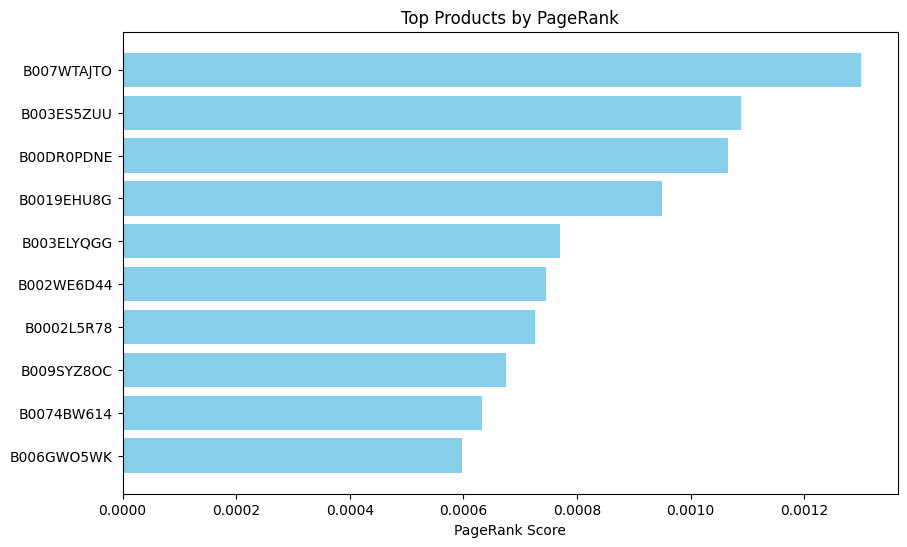

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Load the JSON dataset
data = pd.read_json('reviews_Electronics_5.json', lines=True)

# Step 2: Data Preparation - Extract relevant columns
# Assuming your data has columns 'asin' (product ID), 'reviewerID', and 'overall' (rating)
# Create a list of edges based on user interactions
edges = []

# Create edges from user reviews
for index, row in data.iterrows():
    product_id = row['asin']
    reviewer_id = row['reviewerID']
    edges.append((reviewer_id, product_id))

# Create a DataFrame for edges
edges_df = pd.DataFrame(edges, columns=['User', 'Product'])

# Step 3: Create the Graph
# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for _, row in edges_df.iterrows():
    G.add_edge(row['User'], row['Product'])

# Step 4: Apply the PageRank Algorithm
# Calculate PageRank
pagerank_scores = nx.pagerank(G)

# Convert the scores into a DataFrame for easier analysis
pagerank_df = pd.DataFrame(pagerank_scores.items(), columns=['Product', 'PageRank'])
pagerank_df = pagerank_df.sort_values(by='PageRank', ascending=False)

# Step 5: Visualization - Plot the top products based on PageRank
top_products = pagerank_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_products['Product'], top_products['PageRank'], color='skyblue')
plt.xlabel('PageRank Score')
plt.title('Top Products by PageRank')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


# OUTPUT FOR THE ABOVE CODE


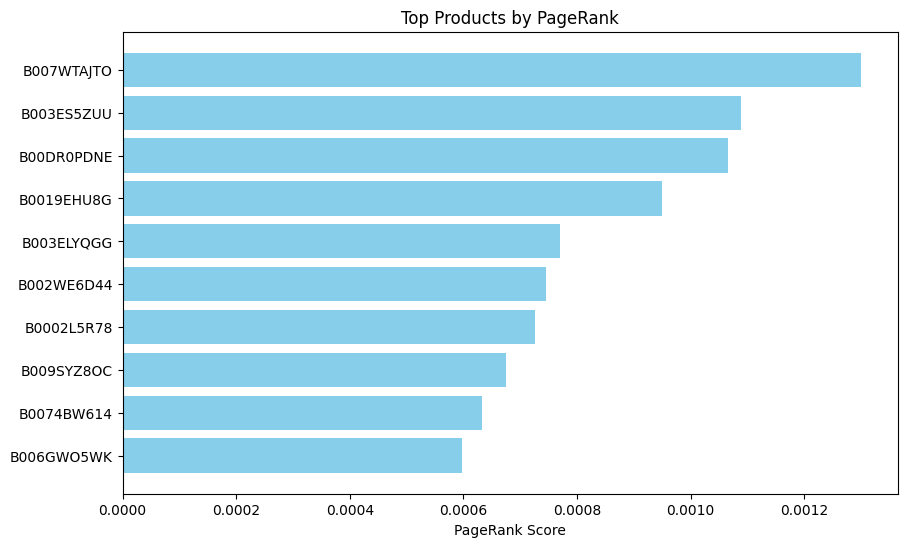

In [ ]:
# Calculate PageRank
pagerank_scores = nx.pagerank(G)

# Convert the scores into a DataFrame for easier analysis
pagerank_df = pd.DataFrame(pagerank_scores.items(), columns=['Product', 'PageRank'])
pagerank_df = pagerank_df.sort_values(by='PageRank', ascending=False)

# Display the top-ranked products
print(pagerank_df.head(10))


           Product  PageRank
240884  B007WTAJTO  0.001300
206801  B003ES5ZUU  0.001088
252254  B00DR0PDNE  0.001066
160916  B0019EHU8G  0.000950
206393  B003ELYQGG  0.000770
198101  B002WE6D44  0.000745
71657   B0002L5R78  0.000725
246809  B009SYZ8OC  0.000675
238037  B0074BW614  0.000632
236155  B006GWO5WK  0.000597


In [ ]:
# Analyze the top products
print("Top 10 Products by PageRank:")
print(top_products)


Top 10 Products by PageRank:
           Product  PageRank
240884  B007WTAJTO  0.001300
206801  B003ES5ZUU  0.001088
252254  B00DR0PDNE  0.001066
160916  B0019EHU8G  0.000950
206393  B003ELYQGG  0.000770
198101  B002WE6D44  0.000745
71657   B0002L5R78  0.000725
246809  B009SYZ8OC  0.000675
238037  B0074BW614  0.000632
236155  B006GWO5WK  0.000597


In [ ]:
# Analyze the bottom products (least PageRank scores)
bottom_products = pagerank_df.tail(10)
print("Bottom 10 Products by PageRank:")
print(bottom_products)


Bottom 10 Products by PageRank:
               Product  PageRank
87264   A38M0YMISYLKM9  0.000002
87265   A2MYOHKAJG8KM1  0.000002
87266    A6VSWJVTWEOII  0.000002
87267   A1GEQRHD33A7Q3  0.000002
87268    AE5QIX1KLB0OD  0.000002
87269   A3U027SLRGEIRA  0.000002
87270   A3EV3PHL4GI90W  0.000002
87271   A1CYMUAHPWCX0P  0.000002
87272   A1UR4DKJPHNFER  0.000002
127702  A32V9TDZ4W28AB  0.000002


In [ ]:
# Calculate average rating and number of reviews
avg_rating = data.groupby('asin')['overall'].mean().reset_index()
num_reviews = data.groupby('asin')['reviewerID'].count().reset_index()

# Merge the average ratings and number of reviews with the PageRank DataFrame
pagerank_df = pagerank_df.merge(avg_rating, left_on='Product', right_on='asin', how='left')
pagerank_df = pagerank_df.merge(num_reviews, left_on='Product', right_on='asin', how='left')

# Rename columns for clarity
pagerank_df.rename(columns={'overall': 'Average_Rating', 'reviewerID': 'Number_of_Reviews'}, inplace=True)

# Calculate a composite score (you can adjust the weights)
pagerank_df['Composite_Score'] = (
    pagerank_df['PageRank'] * 0.5 +
    pagerank_df['Average_Rating'] * 0.3 +
    pagerank_df['Number_of_Reviews'] * 0.2
)

# Sort by composite score
pagerank_df = pagerank_df.sort_values(by='Composite_Score', ascending=False)

# Display top products by composite score
print("Top Products by Composite Score:")
print(pagerank_df[['Product', 'Composite_Score', 'Average_Rating', 'Number_of_Reviews']].head(10))


Top Products by Composite Score:
       Product  Composite_Score  Average_Rating  Number_of_Reviews
0   B007WTAJTO       984.376927        4.587589             4915.0
1   B003ES5ZUU       830.040660        4.800386             4143.0
2   B00DR0PDNE       760.799901        3.997894             3798.0
3   B0019EHU8G       688.440824        4.801164             3435.0
5   B002WE6D44       563.998311        4.659794             2813.0
4   B003ELYQGG       531.707172        4.355958             2652.0
6   B0002L5R78       521.180317        4.599846             2599.0
7   B009SYZ8OC       509.733815        4.444925             2542.0
10  B00BGGDVOO       422.126756        4.421578             2104.0
12  B002V88HFE       417.821148        4.736311             2082.0


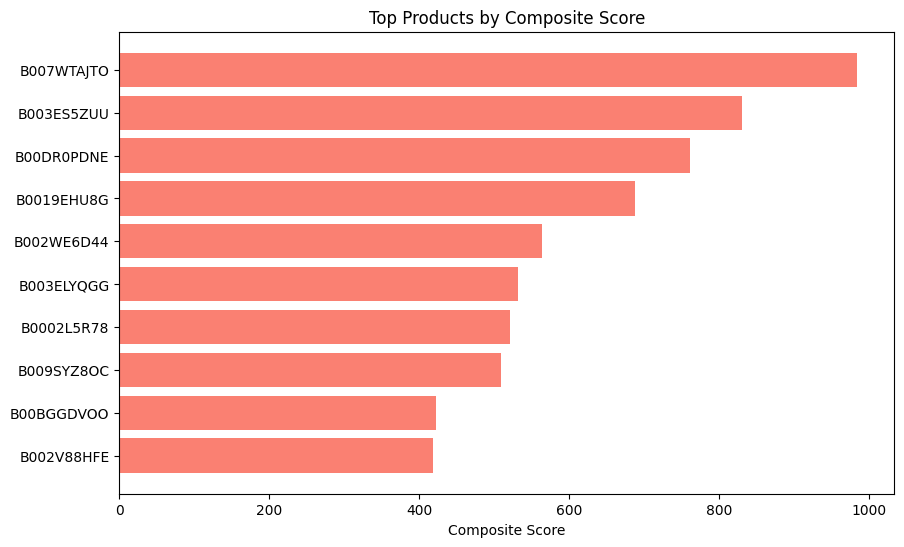

In [ ]:
# Plot the top products based on Composite Score
top_composite_products = pagerank_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_composite_products['Product'], top_composite_products['Composite_Score'], color='salmon')
plt.xlabel('Composite Score')
plt.title('Top Products by Composite Score')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [ ]:
# Top Products Analysis
top_products = pagerank_df.head(10)
print("Top 10 Products by PageRank:")
print(top_products[['Product', 'PageRank', 'Average_Rating', 'Number_of_Reviews']])

# Bottom Products Analysis
bottom_products = pagerank_df.tail(10)
print("\nBottom 10 Products by PageRank:")
print(bottom_products[['Product', 'PageRank', 'Average_Rating', 'Number_of_Reviews']])


Top 10 Products by PageRank:
       Product  PageRank  Average_Rating  Number_of_Reviews
0   B007WTAJTO  0.001300        4.587589             4915.0
1   B003ES5ZUU  0.001088        4.800386             4143.0
2   B00DR0PDNE  0.001066        3.997894             3798.0
3   B0019EHU8G  0.000950        4.801164             3435.0
5   B002WE6D44  0.000745        4.659794             2813.0
4   B003ELYQGG  0.000770        4.355958             2652.0
6   B0002L5R78  0.000725        4.599846             2599.0
7   B009SYZ8OC  0.000675        4.444925             2542.0
10  B00BGGDVOO  0.000566        4.421578             2104.0
12  B002V88HFE  0.000510        4.736311             2082.0

Bottom 10 Products by PageRank:
               Product  PageRank  Average_Rating  Number_of_Reviews
255394  A38M0YMISYLKM9  0.000002             NaN                NaN
255395  A2MYOHKAJG8KM1  0.000002             NaN                NaN
255396   A6VSWJVTWEOII  0.000002             NaN                NaN
255397

In [ ]:
# Normalize the Average Rating and Number of Reviews
pagerank_df['Normalized_Rating'] = (pagerank_df['Average_Rating'] - pagerank_df['Average_Rating'].min()) / (pagerank_df['Average_Rating'].max() - pagerank_df['Average_Rating'].min())
pagerank_df['Normalized_Reviews'] = (pagerank_df['Number_of_Reviews'] - pagerank_df['Number_of_Reviews'].min()) / (pagerank_df['Number_of_Reviews'].max() - pagerank_df['Number_of_Reviews'].min())

# Calculate a new composite score based on normalized values
pagerank_df['Composite_Score'] = (
    pagerank_df['PageRank'] * 0.4 +
    pagerank_df['Normalized_Rating'] * 0.3 +
    pagerank_df['Normalized_Reviews'] * 0.3
)

# Sort by composite score
pagerank_df = pagerank_df.sort_values(by='Composite_Score', ascending=False)

# Display top products by composite score
print("Top Products by Composite Score:")
print(pagerank_df[['Product', 'Composite_Score', 'Average_Rating', 'Number_of_Reviews']].head(10))


Top Products by Composite Score:
       Product  Composite_Score  Average_Rating  Number_of_Reviews
0   B007WTAJTO         0.569589        4.587589             4915.0
1   B003ES5ZUU         0.538295        4.800386             4143.0
3   B0019EHU8G         0.495040        4.801164             3435.0
2   B00DR0PDNE         0.457020        3.997894             3798.0
5   B002WE6D44         0.446351        4.659794             2813.0
6   B0002L5R78         0.428771        4.599846             2599.0
4   B003ELYQGG         0.413736        4.355958             2652.0
7   B009SYZ8OC         0.413650        4.444925             2542.0
12  B002V88HFE         0.407332        4.736311             2082.0
11  B000LRMS66         0.400579        4.745408             1960.0


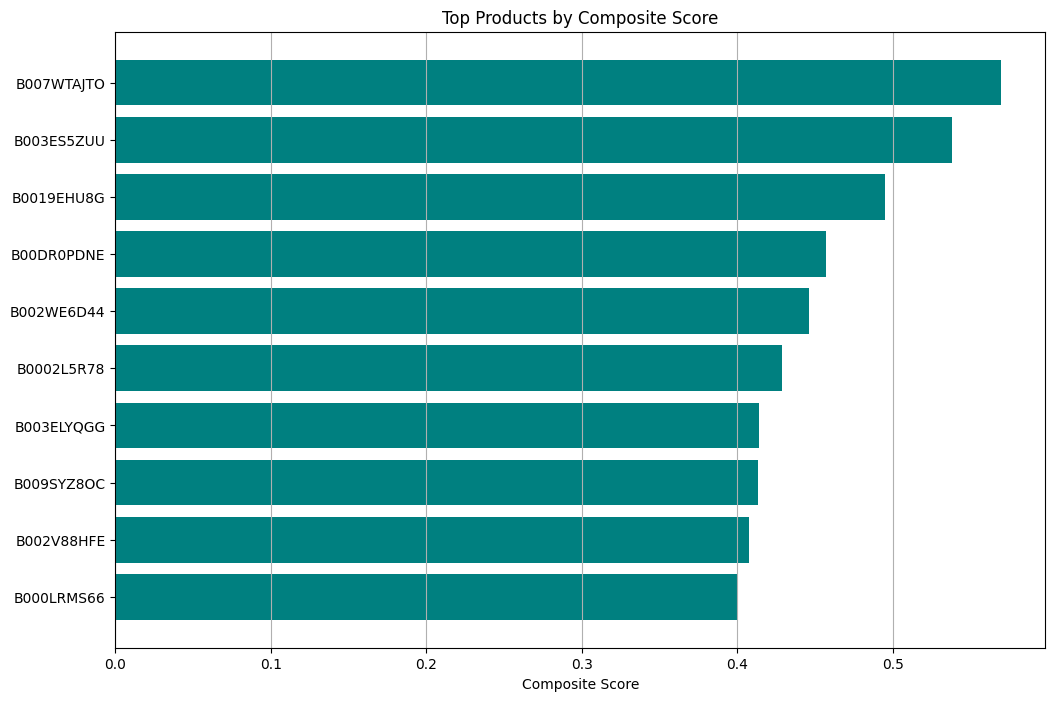

In [ ]:
# Plot the top products based on Composite Score
top_composite_products = pagerank_df.head(10)

plt.figure(figsize=(12, 8))
plt.barh(top_composite_products['Product'], top_composite_products['Composite_Score'], color='teal')
plt.xlabel('Composite Score')
plt.title('Top Products by Composite Score')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x')
plt.show()


# Sentiment Analysis

In [ ]:
from textblob import TextBlob

# Define a function to calculate sentiment
def get_sentiment(review):
    return TextBlob(review).sentiment.polarity  # Returns a score between -1 (negative) and 1 (positive)

# Apply sentiment analysis to the reviews
data['sentiment'] = data['reviewText'].apply(get_sentiment)

# Analyze average sentiment per product
avg_sentiment = data.groupby('asin')['sentiment'].mean().reset_index()

# Merge with the pagerank_df
pagerank_df = pagerank_df.merge(avg_sentiment, left_on='Product', right_on='asin', how='left')
pagerank_df.rename(columns={'sentiment': 'Average_Sentiment'}, inplace=True)

# Display top products by sentiment
print("Top Products by Average Sentiment:")
print(pagerank_df[['Product', 'Average_Sentiment']].head(10))


Top Products by Average Sentiment:
      Product  Average_Sentiment
0  B007WTAJTO           0.279028
1  B003ES5ZUU           0.294187
2  B0019EHU8G           0.308637
3  B00DR0PDNE           0.236952
4  B002WE6D44           0.288280
5  B0002L5R78           0.272315
6  B003ELYQGG           0.290383
7  B009SYZ8OC           0.238088
8  B002V88HFE           0.223554
9  B000LRMS66           0.249094


In [ ]:
# Display detailed analysis of top products
print("Detailed Analysis of Top 10 Products:")
print(top_products[['Product', 'PageRank', 'Average_Rating', 'Number_of_Reviews']].to_string(index=False))

# Display detailed analysis of bottom products
print("\nDetailed Analysis of Bottom 10 Products:")
print(bottom_products[['Product', 'PageRank', 'Average_Rating', 'Number_of_Reviews']].to_string(index=False))


Detailed Analysis of Top 10 Products:
   Product  PageRank  Average_Rating  Number_of_Reviews
B007WTAJTO  0.001300        4.587589             4915.0
B003ES5ZUU  0.001088        4.800386             4143.0
B00DR0PDNE  0.001066        3.997894             3798.0
B0019EHU8G  0.000950        4.801164             3435.0
B002WE6D44  0.000745        4.659794             2813.0
B003ELYQGG  0.000770        4.355958             2652.0
B0002L5R78  0.000725        4.599846             2599.0
B009SYZ8OC  0.000675        4.444925             2542.0
B00BGGDVOO  0.000566        4.421578             2104.0
B002V88HFE  0.000510        4.736311             2082.0

Detailed Analysis of Bottom 10 Products:
       Product  PageRank  Average_Rating  Number_of_Reviews
A38M0YMISYLKM9  0.000002             NaN                NaN
A2MYOHKAJG8KM1  0.000002             NaN                NaN
 A6VSWJVTWEOII  0.000002             NaN                NaN
A1GEQRHD33A7Q3  0.000002             NaN                NaN
 AE5

In [ ]:
# Rename asin column in data to avoid conflict
data_renamed = data.rename(columns={'asin': 'Product'})

# Merge with PageRank DataFrame
combined_df = pagerank_df.merge(data_renamed[['Product', 'Rating_Rank', 'Review_Rank']].drop_duplicates(), on='Product', how='left')

# Calculate average rank for comparison
combined_df['Average_Rank'] = (combined_df['Rating_Rank'] + combined_df['Review_Rank'] + combined_df['PageRank'].rank()) / 3

# Sort by average rank
combined_df = combined_df.sort_values(by='Average_Rank')

# Display comparison of rankings
print("Comparison of Rankings:")
print(combined_df[['Product', 'PageRank', 'Rating_Rank', 'Review_Rank', 'Average_Rank']].head(10))


Comparison of Rankings:
            Product  PageRank  Rating_Rank  Review_Rank   Average_Rank
1131700  B00IX6D0EQ  0.000003     504513.5        974.5  233141.000000
172787   B006CY5XAK  0.000003     504513.5        360.0  233162.166667
628674   B00EHJ6DV0  0.000002     504513.5       4069.0  233686.166667
887148   B00KCQISWY  0.000002     504513.5       4069.0  233700.833333
543454   B00INTDOT4  0.000002     504513.5       4069.0  233703.000000
223361   B00KVNY2KA  0.000002     504513.5       4069.0  233711.333333
168254   B00KXAFYZS  0.000002     504513.5       4069.0  233723.333333
443382   B00HA4ORMQ  0.000002     504513.5       4069.0  233740.666667
543447   B00JZC972Q  0.000002     504513.5       4069.0  233792.333333
588861   B00FDK6WKY  0.000003     504513.5       4069.0  233922.166667


In [ ]:
# Function to calculate composite score with different weights
def calculate_composite_score(pagerank, rating, reviews, weight_pagerank=0.4, weight_rating=0.3, weight_reviews=0.3):
    return (pagerank * weight_pagerank + rating * weight_rating + reviews * weight_reviews)

# Experiment with different weights
weights = [(0.4, 0.3, 0.3), (0.5, 0.25, 0.25), (0.3, 0.4, 0.3), (0.2, 0.5, 0.3)]

for weight in weights:
    pagerank_df['Composite_Score'] = calculate_composite_score(
        pagerank_df['PageRank'],
        pagerank_df['Normalized_Rating'],
        pagerank_df['Normalized_Reviews'],
        *weight
    )
    top_composite_products = pagerank_df.head(10)

    # Display top products for each set of weights
    print(f"\nTop Products with Weights {weight}:")
    print(top_composite_products[['Product', 'Composite_Score']])



Top Products with Weights (0.4, 0.3, 0.3):
      Product  Composite_Score
0  B007WTAJTO         0.569589
1  B003ES5ZUU         0.538295
2  B0019EHU8G         0.495040
3  B00DR0PDNE         0.457020
4  B002WE6D44         0.446351
5  B0002L5R78         0.428771
6  B003ELYQGG         0.413736
7  B009SYZ8OC         0.413650
8  B002V88HFE         0.407332
9  B000LRMS66         0.400579

Top Products with Weights (0.5, 0.25, 0.25):
      Product  Composite_Score
0  B007WTAJTO         0.474874
1  B003ES5ZUU         0.448761
2  B0019EHU8G         0.412691
3  B00DR0PDNE         0.381028
4  B002WE6D44         0.372083
5  B0002L5R78         0.357430
6  B003ELYQGG         0.344908
7  B009SYZ8OC         0.344820
8  B002V88HFE         0.339528
9  B000LRMS66         0.333908

Top Products with Weights (0.3, 0.4, 0.3):
      Product  Composite_Score
0  B007WTAJTO         0.659149
1  B003ES5ZUU         0.633196
2  B0019EHU8G         0.589974
3  B00DR0PDNE         0.531861
4  B002WE6D44         0.53777

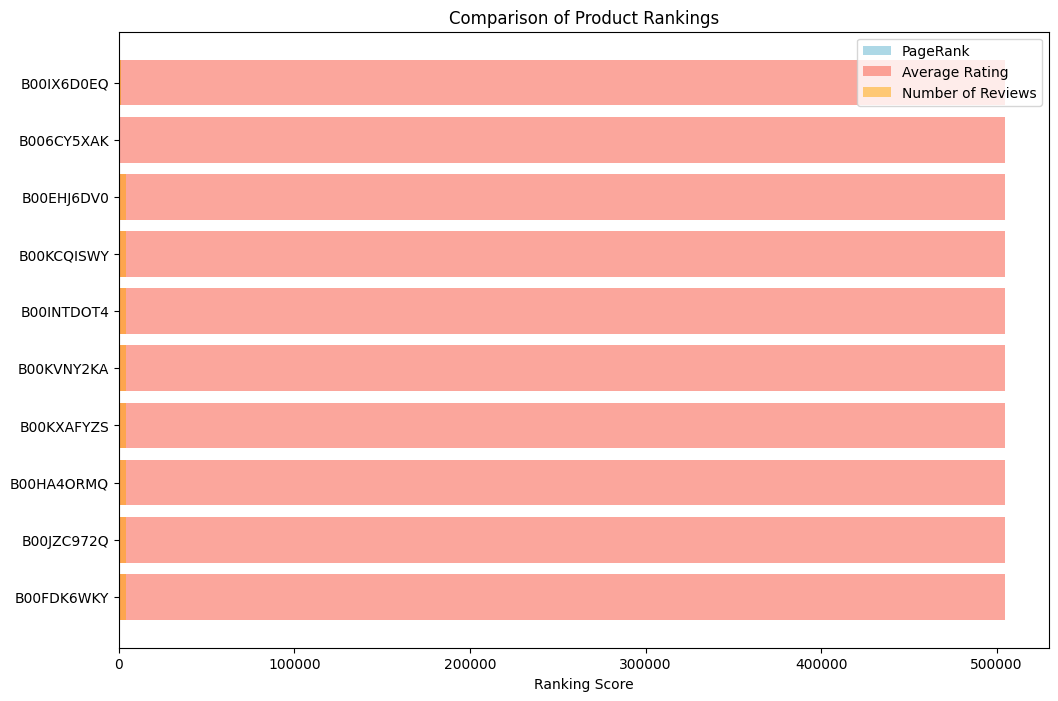

In [ ]:
# Plot comparison of rankings
plt.figure(figsize=(12, 8))

# Plot PageRank scores
plt.barh(combined_df['Product'].head(10), combined_df['PageRank'].head(10), color='lightblue', label='PageRank')

# Plot Average Rating Rank
plt.barh(combined_df['Product'].head(10), combined_df['Rating_Rank'].head(10), color='salmon', alpha=0.7, label='Average Rating')

# Plot Number of Reviews Rank
plt.barh(combined_df['Product'].head(10), combined_df['Review_Rank'].head(10), color='orange', alpha=0.5, label='Number of Reviews')

plt.xlabel('Ranking Score')
plt.title('Comparison of Product Rankings')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


# ICT TOOLS

In [ ]:
  import pandas as pd

  # Load the dataset
  data = pd.read_json('http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz', lines=True)

  # Display the first few rows and structure of the dataset
  print(data.head())
  print(data.info())


       reviewerID        asin              reviewerName   helpful  \
0   AO94DHGC771SJ  0528881469                   amazdnu    [0, 0]   
1   AMO214LNFCEI4  0528881469           Amazon Customer  [12, 15]   
2  A3N7T0DY83Y4IG  0528881469             C. A. Freeman  [43, 45]   
3  A1H8PY3QHMQQA0  0528881469  Dave M. Shaw "mack dave"   [9, 10]   
4  A24EV6RXELQZ63  0528881469               Wayne Smith    [0, 0]   

                                          reviewText  overall  \
0  We got this GPS for my husband who is an (OTR)...        5   
1  I'm a professional OTR truck driver, and I bou...        1   
2  Well, what can I say.  I've had this unit in m...        3   
3  Not going to write a long review, even thought...        2   
4  I've had mine for a year and here's what we go...        1   

                                  summary  unixReviewTime   reviewTime  
0                         Gotta have GPS!      1370131200   06 2, 2013  
1                       Very Disappointed      1

In [ ]:
# Display the first few rows of the dataset
print(data.head())

# Display the column names
print(data.columns)


       reviewerID        asin              reviewerName   helpful  \
0   AO94DHGC771SJ  0528881469                   amazdnu    [0, 0]   
1   AMO214LNFCEI4  0528881469           Amazon Customer  [12, 15]   
2  A3N7T0DY83Y4IG  0528881469             C. A. Freeman  [43, 45]   
3  A1H8PY3QHMQQA0  0528881469  Dave M. Shaw "mack dave"   [9, 10]   
4  A24EV6RXELQZ63  0528881469               Wayne Smith    [0, 0]   

                                          reviewText  overall  \
0  We got this GPS for my husband who is an (OTR)...        5   
1  I'm a professional OTR truck driver, and I bou...        1   
2  Well, what can I say.  I've had this unit in m...        3   
3  Not going to write a long review, even thought...        2   
4  I've had mine for a year and here's what we go...        1   

                                  summary  unixReviewTime   reviewTime  
0                         Gotta have GPS!      1370131200   06 2, 2013  
1                       Very Disappointed      1

In [ ]:
# Adjust this list based on the actual columns in your dataset
# Assuming 'helpfulness' is not present, we only select the available columns
data = data[['reviewerID', 'asin', 'overall']]  # Remove 'helpfulness'

# Drop duplicates if necessary
data.drop_duplicates(inplace=True)

# Optionally, filter out rows with missing values
data.dropna(inplace=True)


<ipython-input-12-9b3ca2cb2074>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)
<ipython-input-12-9b3ca2cb2074>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


       reviewerID        asin              reviewerName   helpful  \
0   AO94DHGC771SJ  0528881469                   amazdnu    [0, 0]   
1   AMO214LNFCEI4  0528881469           Amazon Customer  [12, 15]   
2  A3N7T0DY83Y4IG  0528881469             C. A. Freeman  [43, 45]   
3  A1H8PY3QHMQQA0  0528881469  Dave M. Shaw "mack dave"   [9, 10]   
4  A24EV6RXELQZ63  0528881469               Wayne Smith    [0, 0]   

                                          reviewText  overall  \
0  We got this GPS for my husband who is an (OTR)...        5   
1  I'm a professional OTR truck driver, and I bou...        1   
2  Well, what can I say.  I've had this unit in m...        3   
3  Not going to write a long review, even thought...        2   
4  I've had mine for a year and here's what we go...        1   

                                  summary  unixReviewTime   reviewTime  
0                         Gotta have GPS!      1370131200   06 2, 2013  
1                       Very Disappointed      1

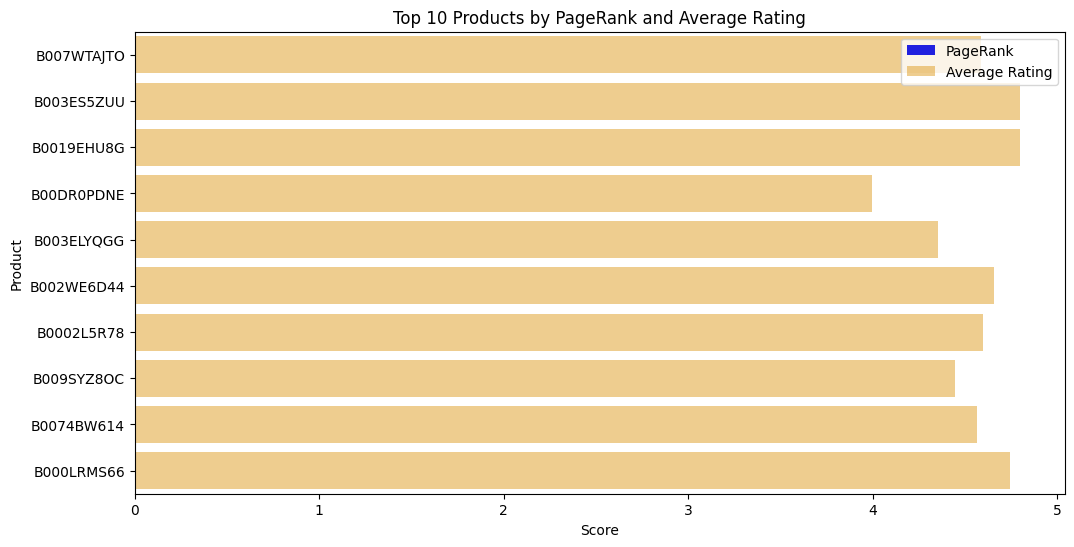

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_json('http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz', lines=True)

# Check dataset structure
print(data.head())
print(data.columns)

# Select relevant columns (adjusted based on actual columns)
data = data[['reviewerID', 'asin', 'overall']]  # Removed 'helpfulness'

# Drop duplicates if necessary
data.drop_duplicates(inplace=True)

# Create a directed graph
G = nx.DiGraph()

# Add edges based on user-product interactions
for index, row in data.iterrows():
    G.add_edge(row['reviewerID'], row['asin'], weight=row['overall'])

# Calculate PageRank
pagerank_scores = nx.pagerank(G)

# Convert to DataFrame
pagerank_df = pd.DataFrame(list(pagerank_scores.items()), columns=['Product', 'PageRank'])

# Calculate average ratings
average_ratings = data.groupby('asin')['overall'].mean().reset_index()
average_ratings.columns = ['Product', 'Average_Rating']

# Merge with PageRank DataFrame
combined_df = pagerank_df.merge(average_ratings, on='Product', how='left')

# Plotting the top products
plt.figure(figsize=(12, 6))
sns.barplot(x='PageRank', y='Product', data=combined_df.nlargest(10, 'PageRank'), color='blue', label='PageRank')
sns.barplot(x='Average_Rating', y='Product', data=combined_df.nlargest(10, 'PageRank'), color='orange', label='Average Rating', alpha=0.5)
plt.title('Top 10 Products by PageRank and Average Rating')
plt.xlabel('Score')
plt.ylabel('Product')
plt.legend()
plt.show()


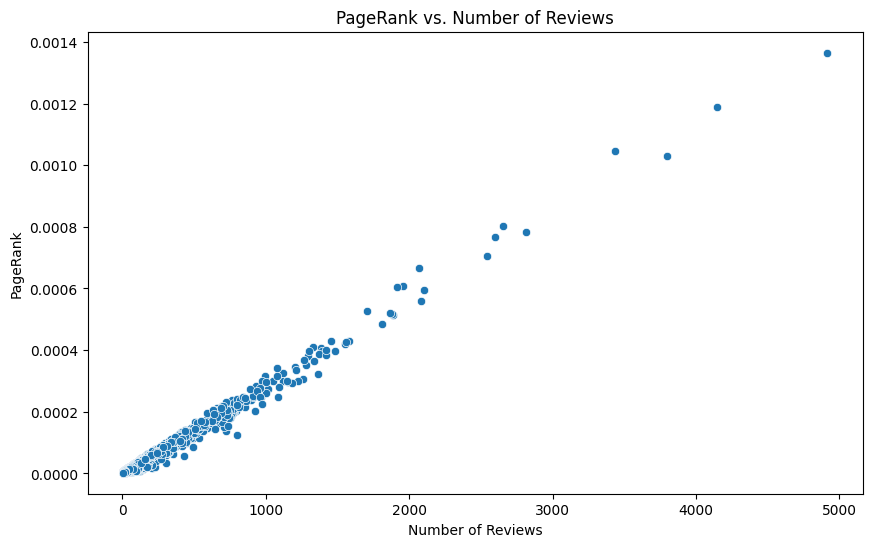

In [ ]:
# Count the number of reviews per product
review_counts = data['asin'].value_counts().reset_index()
review_counts.columns = ['Product', 'Review_Count']

# Merge review counts with combined_df
combined_df = combined_df.merge(review_counts, on='Product', how='left')

# Visualize the relationship between Review Count and PageRank
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='Review_Count', y='PageRank')
plt.title('PageRank vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('PageRank')
plt.show()


# Improved Product Visibility

In [ ]:
import pandas as pd
import networkx as nx

# Load the dataset
data = pd.read_json('http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz', lines=True)

# Select relevant columns and drop duplicates
data = data[['reviewerID', 'asin', 'overall']]
data.drop_duplicates(inplace=True)

# Create a directed graph from user interactions
def create_product_graph(data):
    G = nx.DiGraph()
    for _, row in data.iterrows():
        G.add_edge(row['reviewerID'], row['asin'], weight=row['overall'])  # Add weighted edges
    return G

# Calculate PageRank scores
def calculate_pagerank(G):
    return nx.pagerank(G, weight='weight')

# Build the graph and calculate PageRank
product_graph = create_product_graph(data)
pagerank_scores = calculate_pagerank(product_graph)

# Convert PageRank scores to DataFrame for easy access
pagerank_df = pd.DataFrame(pagerank_scores.items(), columns=['asin', 'PageRank'])
pagerank_df.set_index('asin', inplace=True)

# Create a function to recommend products based on a user's previous reviews
def recommend_products(user_id, pagerank_df, data):
    user_reviews = data[data['reviewerID'] == user_id]  # Get reviews by the user
    reviewed_asins = user_reviews['asin'].tolist()  # Get ASINs of reviewed products

    # Filter out products already reviewed by the user
    recommended = pagerank_df.loc[~pagerank_df.index.isin(reviewed_asins)]

    return recommended.nlargest(5, 'PageRank')  # Return top 5 recommended products

# Example usage
user_id = data['reviewerID'].iloc[0]  # Replace with a specific user ID
recommended_products_df = recommend_products(user_id, pagerank_df, data)

# Display recommendations
print(f"Recommended products for user {user_id}:\n", recommended_products_df)


Recommended products for user AO94DHGC771SJ:
             PageRank
asin                
B007WTAJTO  0.001365
B003ES5ZUU  0.001187
B0019EHU8G  0.001046
B00DR0PDNE  0.001031
B003ELYQGG  0.000801


#  Enhanced User Experience

In [ ]:
import pandas as pd
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_json('http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz', lines=True)

# Select relevant columns and drop duplicates
data = data[['reviewerID', 'asin', 'overall']]
data.drop_duplicates(inplace=True)


In [ ]:
# Create a directed graph from user interactions
def create_product_graph(data):
    G = nx.DiGraph()
    for _, row in data.iterrows():
        G.add_edge(row['reviewerID'], row['asin'], weight=row['overall'])  # Weighted edges
    return G

# Calculate PageRank scores
def calculate_pagerank(G):
    return nx.pagerank(G, weight='weight')

# Build the graph and calculate PageRank
product_graph = create_product_graph(data)
pagerank_scores = calculate_pagerank(product_graph)

# Convert PageRank scores to DataFrame for easy access
pagerank_df = pd.DataFrame(pagerank_scores.items(), columns=['asin', 'PageRank'])
pagerank_df.set_index('asin', inplace=True)


In [ ]:
# Create user profiles based on average ratings for each product
user_profiles = data.groupby(['reviewerID', 'asin'])['overall'].mean().unstack(fill_value=0)

# Standardize the user profiles for cosine similarity calculation
scaler = StandardScaler()
user_profiles_scaled = scaler.fit_transform(user_profiles)

# Calculate cosine similarity matrix between users
user_similarity = cosine_similarity(user_profiles_scaled)
user_similarity_df = pd.DataFrame(user_similarity, index=user_profiles.index, columns=user_profiles.index)


NameError: name 'data' is not defined

In [ ]:
# Function to get recommendations based on PageRank and user similarity
def recommend_products(user_id, pagerank_df, user_similarity_df, data):
    # Get the products the user has reviewed
    user_reviews = data[data['reviewerID'] == user_id]
    reviewed_asins = user_reviews['asin'].tolist()

    # Get the indices of similar users
    similar_users = user_similarity_df[user_id].nlargest(5).index.tolist()

    # Aggregate recommendations based on similar users' preferences
    similar_user_reviews = data[data['reviewerID'].isin(similar_users)]
    similar_user_recommendations = similar_user_reviews[~similar_user_reviews['asin'].isin(reviewed_asins)]

    # Calculate average PageRank score for similar users' products
    recommended_products = similar_user_recommendations.groupby('asin')['overall'].mean().reset_index()
    recommended_products['PageRank'] = recommended_products['asin'].map(pagerank_df['PageRank'])

    # Combine and sort recommendations
    final_recommendations = recommended_products.sort_values(by=['PageRank', 'overall'], ascending=False).head(5)

    return final_recommendations[['asin', 'PageRank', 'overall']]

# Example usage
user_id = data['reviewerID'].iloc[0]  # Replace with a specific user ID
recommended_products_df = recommend_products(user_id, pagerank_df, user_similarity_df, data)

# Display recommendations
print(f"Recommended products for user {user_id}:\n", recommended_products_df)
